<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión 


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [161]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. **Definición del problema**: Dado este conjunto de datos, queremos ser capaz de predecir el valor medio de las propiedades, tomando las características proporcionadas en este dataset como variables. Para esto, vamos a aplicar técnicas básicas de Machine Learning aprendidas en clase, para entrenar un modelo que nos permita responder esta pregunta.


2. **Estadística descriptiva**: Investiguemos propiedades básicas de este dataset.


In [162]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Podemos ver que la data de este dataframe tiene solamente tipo de dato numérico, y no hay entradas nulas de las cuales encargarse. Además, podemos ver que tenemos 20640 datos y 9 características, las cuales aparecen mencionadas al inicio de este laboratorio (`target` se refiere a `medianhousevalue`, que es la variable que queremos predecir). Eso sí, notemos que falta la característica `ocean_proximity`  en este dataset. Esto no será un problema, pues podemos omitir esta variable del análisis pedido.

Como el dataset parece estar de buena forma, revisemos estadísticas básicas de cada una de las columnas.

In [163]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


A primer ojo, podemos ver que las desviaciones estándares de cada columna parecen ser relativamente pequeñas para la mayoría de las columnas. Esto no es el caso para las columnas `HouseAge`, `Population` y `AveOccup`. Para `HouseAge` puede ser esperado, pues hay evidentemente muchas propiedades construidas en el pasado, y actualmente hay mucha mayor demanda y tecnología que permite construir muchas propiedades nuevas. Para `Population`, puede haber mucha variabilidad entre distintas zonas urbanas y rurales que hacen que la densidad de gente en una región pueda variar demasiado y con varios ordenes de magnitus de diferencia. Similarmente, `AveOccup` presenta esta variabilidad pues existe un porcentaje bajo de propiedades cuyas dimensiones son muchisimo mas grandes que la de una propiedad usual.

3. **Visualización descriptiva**: Veamos un histograma de cada una de estas variables, para visualizar mejor esta información y con mayor detalle.


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

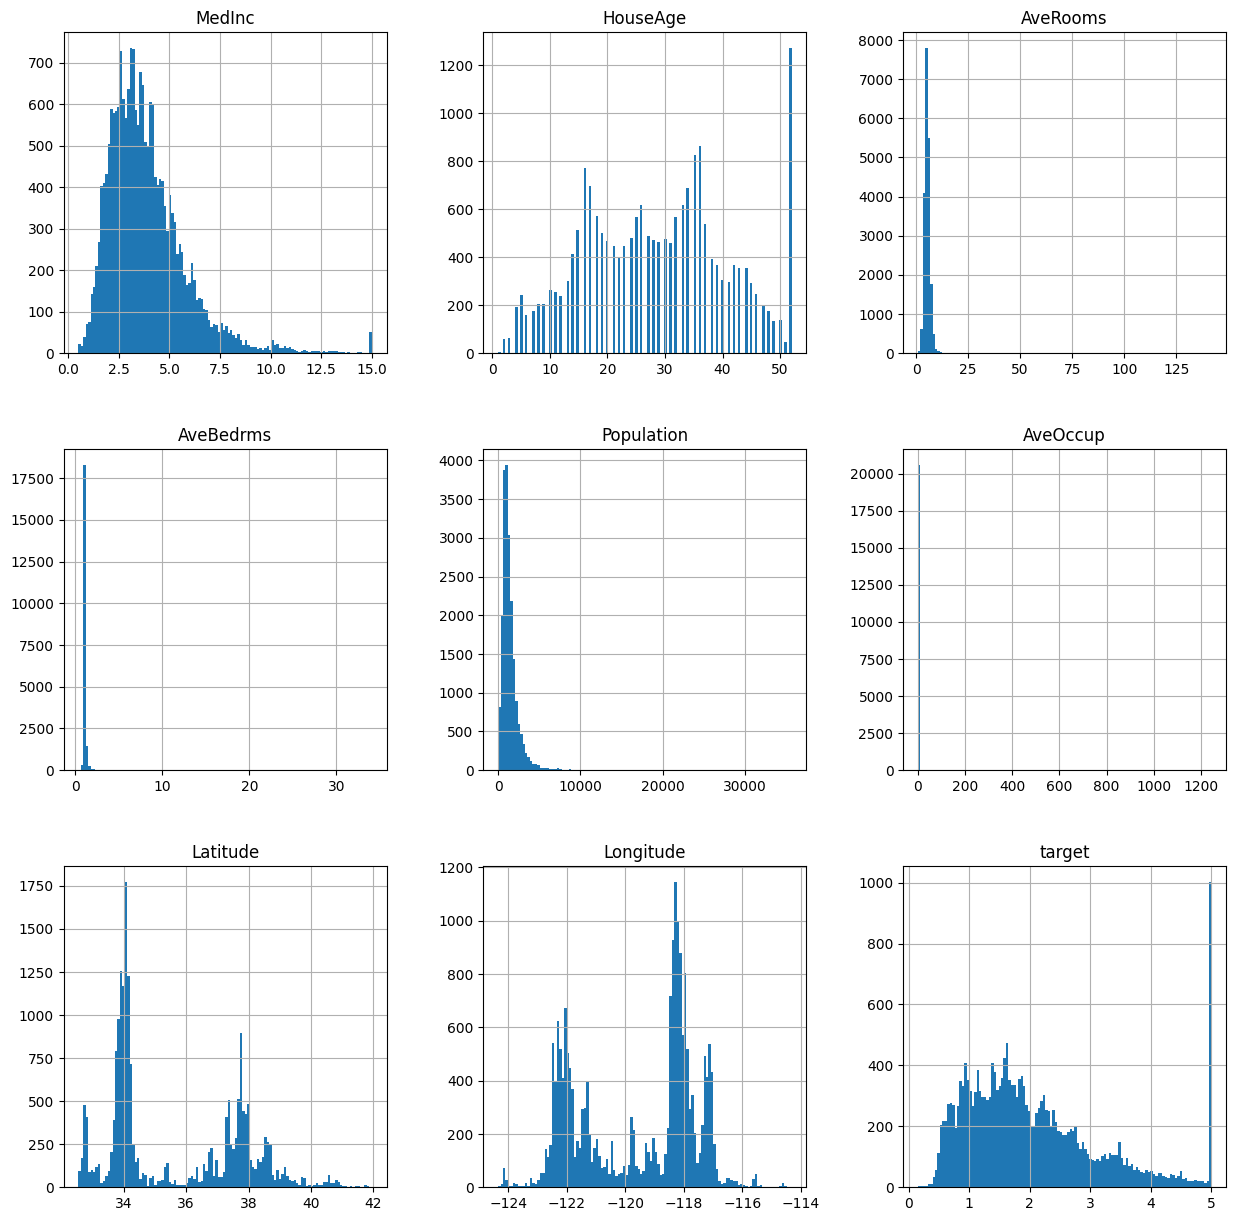

In [164]:
housing.hist(bins=120, figsize=(15, 15))

Podemos decir con esta visualización varias cosas de cada variable:

- `MedInc`: Parece estar distribuida parecida a una normal cargada hacia la izquierda, con una concentración de valores extremales a la derecha con un valor cercano a 15.0.
- `HouseAge`: Parece tener dos cúspides simétricas a la mitad del rango de los valores, con una concentración grande de valores extremales a la derecha con un valor cercano a 50. Además, el histograma indica que esta variable, aunque esté en formato flotante, pareciese que tomase solamente valores enteros.
- `AveRooms`: Parece distribuirse parecida a una normal con casi todos sus valores entre 0 y 12, con pocos valores extremales que no se aprecian en el histograma con valores llegando a 125.
- `AveBedrms`: Similar a la anterior, pero mucho más concentrada en el rango de 2 a 6.
- `Population`: Parece ser una distribución cargada hacia la izquierda, entre el rango de valores 0 y 7000. Parece tomar valores extremales que no se aprecian en el histograma con valores llegando a 35000 aproximadamente.
- `AveOccup`: Similar a `AveRooms` y `AveBedrms`, pero más extrema aún, pareciendo tomar todos sus valores en una barra del histograma muy cercana a 0, y tomando valores extremales en el rango de 1200 que no se aprecian en el histograma.
- `Latitude`: Tiene una distribución con múltiples cúspides, con sus principales en los valores de 34 y 38.
- `Longitude`: Similar a Latitude, pero con sus cúspides principales entre los valores de -118 y -122.
- `target`: Tiene una distribución parecida a una normal cargada hacia la izquierda ligeramente. Eso sí, tiene muchos outliers en una cúspide muy delgada en el valor 5.

También podemos visualizar la matriz de correlación de cada una de estas variables.

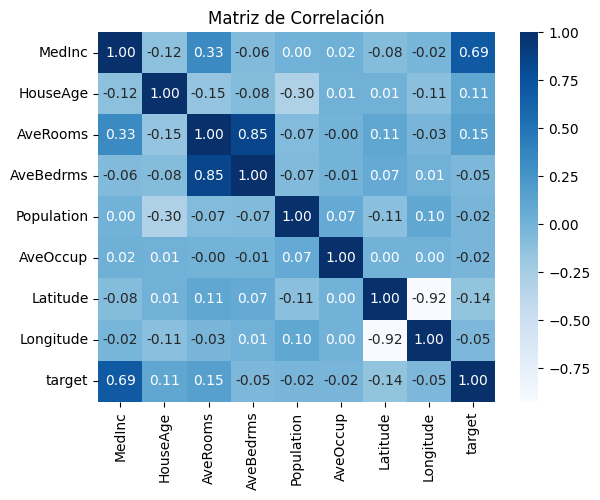

In [165]:
sns.heatmap(housing.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

4. **Preprocesamiento**: Para asegurar de entrenar bien nuestro modelo, quitaremos los datos en cada columna que estén a más de 5 desviaciones estandar de la media.


In [166]:
housing_columns=housing.columns
filter=housing.copy()

for column in housing_columns:
    if column!='target':
        filter[column] = (housing[column]-housing[column].mean())/housing[column].std()
        filter[column] = np.where(filter[column]>5,False,True)
    else:
        filter[column]=True        

filter.shape[0]-filter.sum()

MedInc         68
HouseAge        0
AveRooms       82
AveBedrms      85
Population    117
AveOccup        6
Latitude        0
Longitude       0
target          0
dtype: int64

Aquí podemos ver un desglose de los datos encontrados que están fuera de las 5 desviaciones estandares en su respectiva columna. Ahora, creemos un nuevo dataframe filtrando fuera estos datos.

In [167]:
df_filter=pd.DataFrame()
df_filter=housing[filter].dropna().reset_index(drop=True)
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20358 non-null  float64
 1   HouseAge    20358 non-null  float64
 2   AveRooms    20358 non-null  float64
 3   AveBedrms   20358 non-null  float64
 4   Population  20358 non-null  float64
 5   AveOccup    20358 non-null  float64
 6   Latitude    20358 non-null  float64
 7   Longitude   20358 non-null  float64
 8   target      20358 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Podemos ver que tenemos ahora 20358 datos, en vez de los 20640 del dataframe original, es decir la cantidad de datos filtrados fuera por este proceso es:

In [168]:
housing.shape[0]-df_filter.shape[0]

282

5. **Selección de modelo**: Escogamos los siguiente cuatro modelos de la librería sklearn para el entrenamiento:

- Linear Regression
- Decision Tree Regressor
- Support Vector Regression (SVR)
- Random Forest Regressor



Ocupemos el 80% de los datos para entrenamiento y 20% para el testeo del modelo. Fijemos un estado aleatorio para obtener resultados replicables.

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

X=df_filter.drop(columns='target')
y=df_filter['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

reg_model=[LinearRegression(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]
reg_name=['linear','decision_tree','svr','random_forest']

reg=[reg_model_i.fit(X_train,y_train) for reg_model_i in reg_model]
y_reg=[reg_i.predict(X_test) for reg_i in reg]

6. **Métricas y análisis de resultados**: Con las regresiones ya creadas, veamos las métricas de desempeño de cada uno de estos modelos.


In [170]:
metrics=[regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_reg[i]})).assign(model=reg_name[i]) for i in range(len(reg_name))]

reg_df=pd.concat(metrics).reset_index(drop=True)
reg_df

,mae,mse,rmse,mape,smape,model
0,0.4896,0.4570,0.6760,29.8427,0.4597,linear
1,0.4722,0.5251,0.7247,25.9986,0.4127,decision_tree
2,0.8539,1.3178,1.1479,51.6487,0.6812,svr
3,0.3267,0.2505,0.5005,18.9489,0.3186,random_forest


Podemos ver que el modelo por el modelo Random Forest es el que tiene el mejor desempeño en cada una de las métricas calculadas.

7. **Visualización de resultados del modelo**: Como estos modelos predicen una variable aleatoria


8. **Conclusiones**: Entre los cuatro modelos probados, el que tiene mejor desempeño (en todas las métricas calculadas)  para predecir el valor medio de las propiedades fue el entrenado con el modelo Random Forest. Además, el MAE y MSE de este modelo son en magnitud aproximadamente un cuarto y un quinto la desviación estandar del valor predecido, indicando una buena exactitud y precisión del modelo. Luego, el modelo entrenado con Random Forest parece predecir los valores pedidos con buen desempeño.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [171]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [172]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [173]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [174]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [175]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Resolvamos este ejercicio respondiendo cada una de las preguntas dadas en las sugerencias.

* ¿Cómo se distribuyen los datos?

Veamos un histograma de cada columna, para visualizar la distribución de cada uno de estos datos.

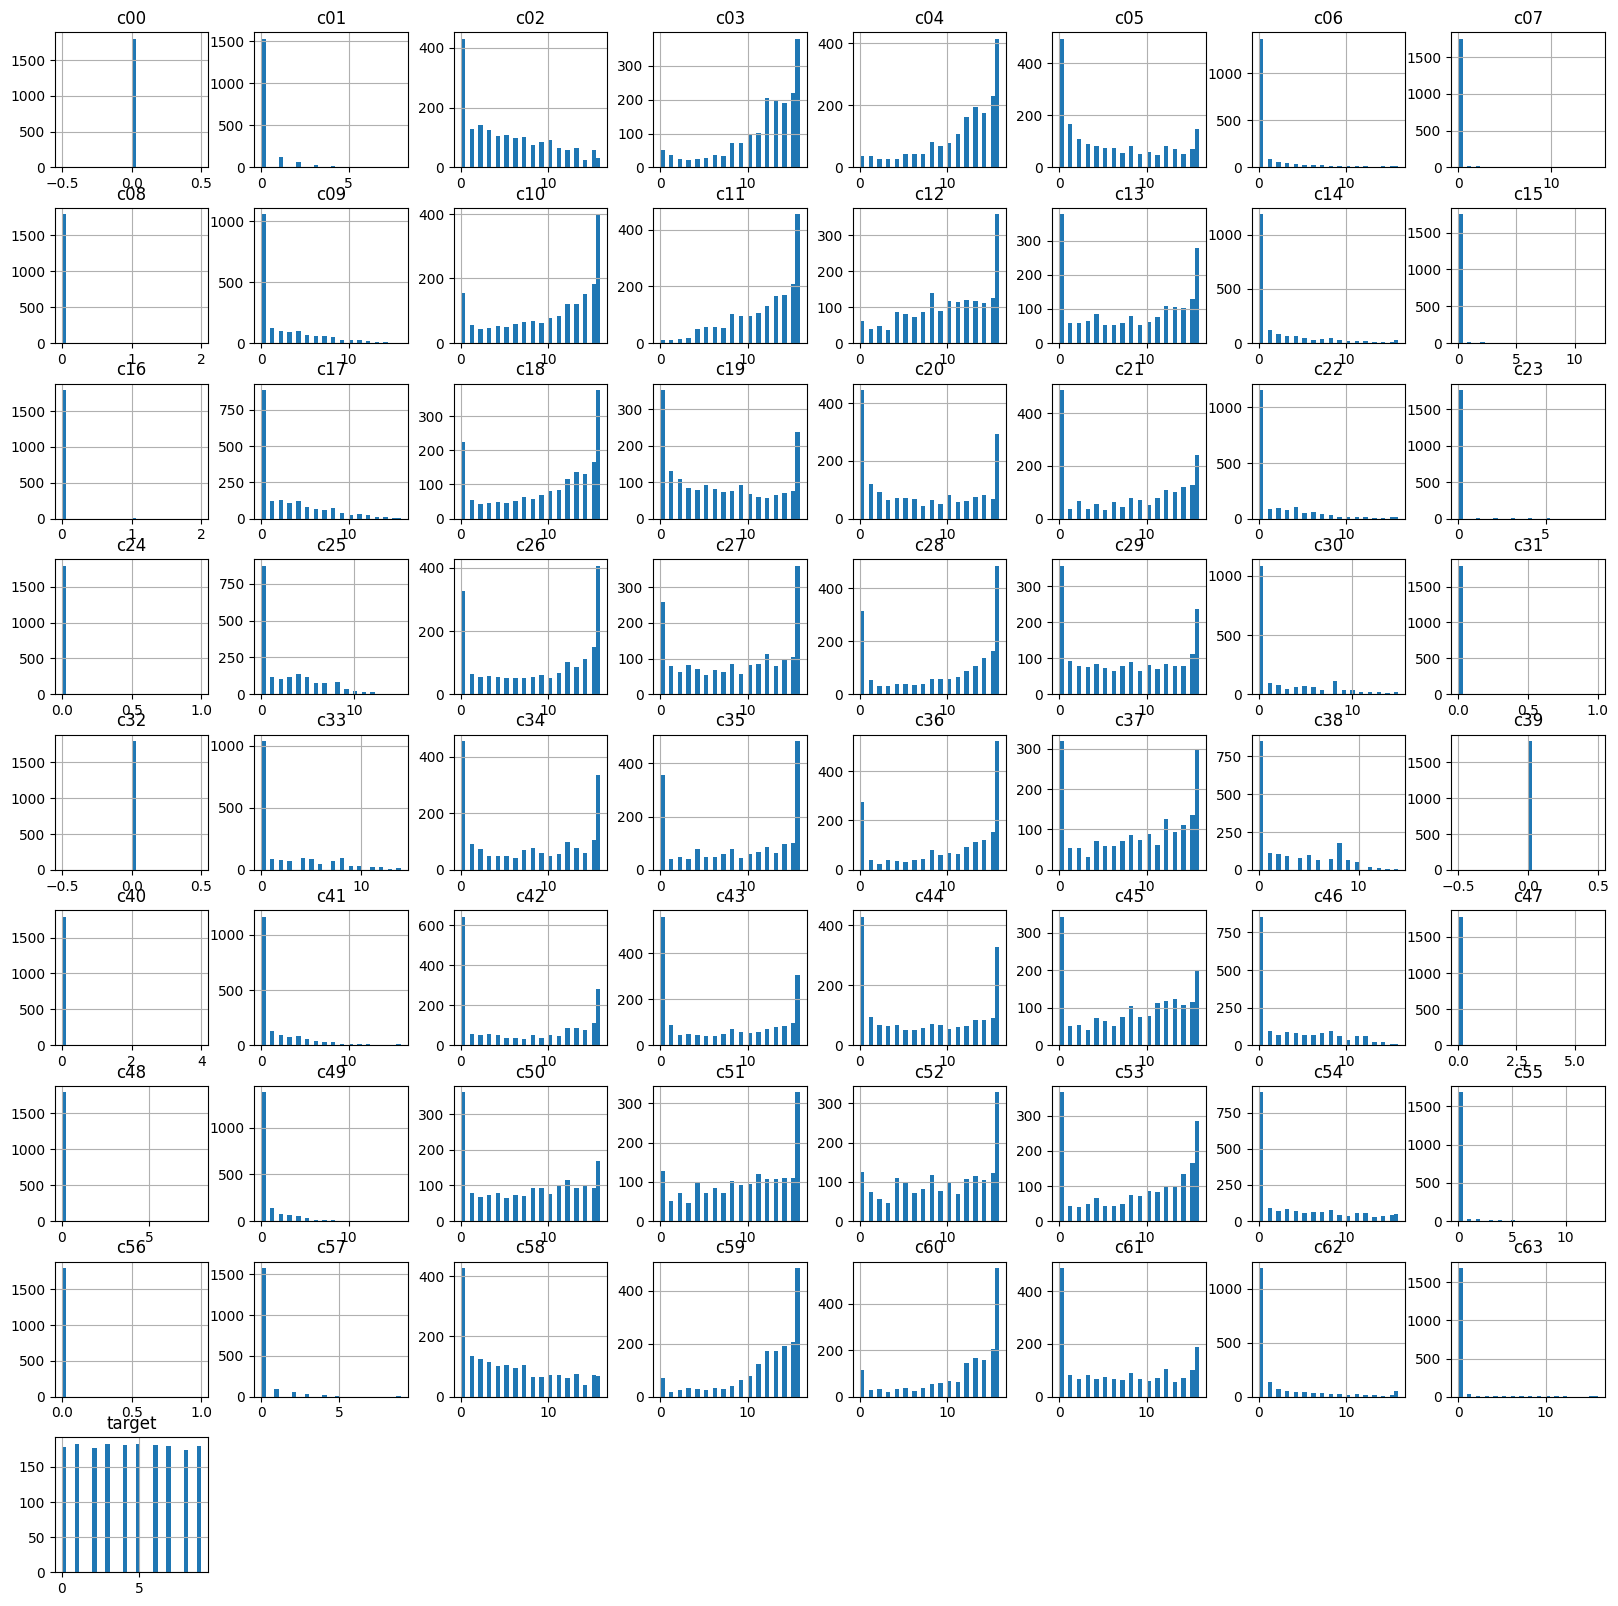

In [176]:
digits.hist(bins=32,figsize=(20,20))
plt.show()

Se pueden observar bastantes columnas con el mismo comportamiento, pero son demasiadas como para poder indicar una a una. Eso sí, podemos ver que la cantidad de dígitos en el dataset (dados por la columna `target`) parecen estar distribuidos uniformemente.

* ¿Cuánta memoria estoy utilizando? ¿Qué tipo de datos son? ¿Cuántos registros por clase hay?

Veamos información general de este dataframe primero, a ver si puede responder estas tres preguntas al mismo tiempo.

In [177]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

Podemos ver que este dataframe usa 456.4KB de memoria. Como son demasiadas columnas, podemos ser más sutiles y ver la cantidad de tipos de datos que aparecen en el dataframe.

In [178]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

Podemos ver que todos los datos son de tipo `int32`. Veamos cuantos registros hay por dígito.

In [179]:
digits['target'].value_counts().reset_index().sort_values(by='target').reset_index(drop=True)

,target,count
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


Por si acaso, revisemos la cantidad de entradas nulas para asegurar que no hayan problemas al continuar en las siguientes secciones.

In [180]:
digits.isna().sum().sum()

0

Como no hay entradas nulas, podemos seguir con el desarrollo.

* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Se supone que los datos deben tomar valores solo entre 0 y 16, y deben ser enteros. Revisemos si así es el caso.

In [181]:
mask=(digits<0)|(digits>16)|(digits.astype(int)!=digits)
mask.sum().sum()

0

Luego, podemos ver que todos los datos cumplen esta criteria, y luego el dataframe tiene todos los datos en el formato que corresponden.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [182]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

Hagamos lo pedido, basta usar el comando `imshow` para entradas distintas de `digits_dict`.

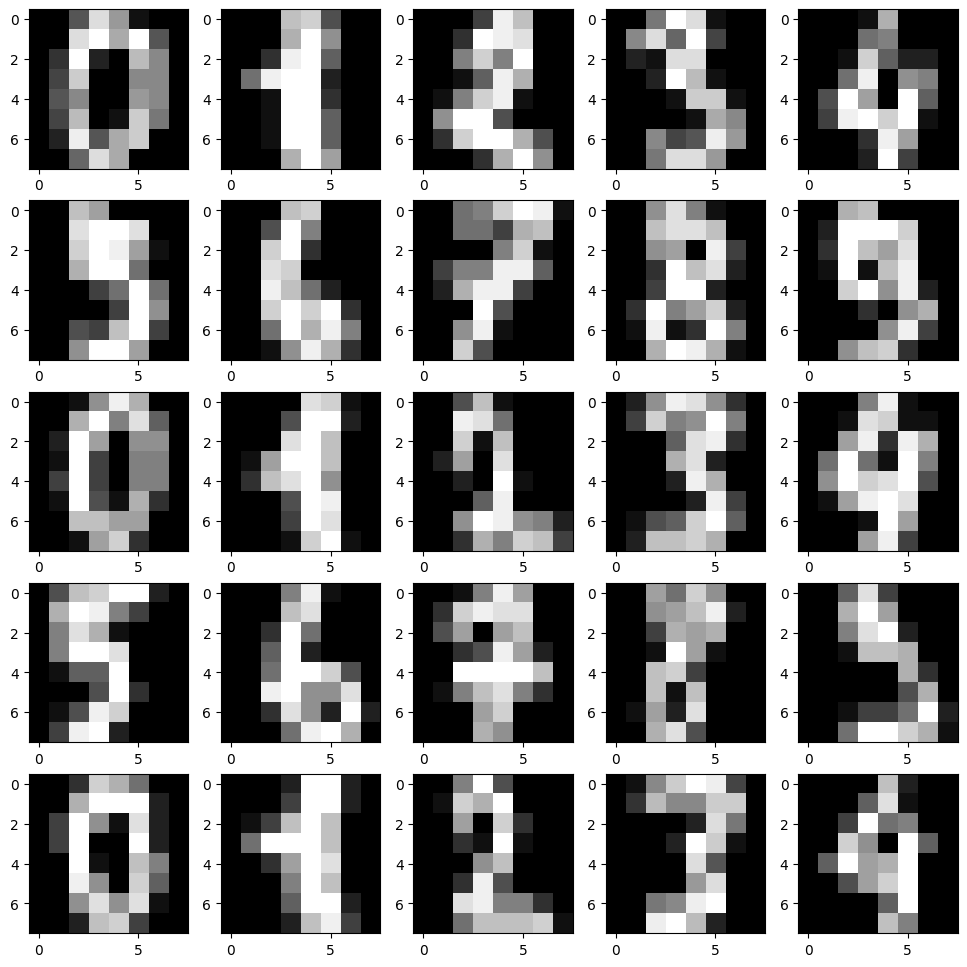

In [183]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx):
    for j in range(ny):
        axs[i,j].imshow(digits_dict['images'][nx*i+j],cmap='gray')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Primero, creemos y entrenemos un modelo de la misma forma que lo hicimos en la pregunta anterior del laboratorio. Utilizaremos los siguientes tres modelos de clasificación y los compararemos:

- Logistic Regression,
- K-Nearest Neighbors,
- Random Forest.

Como métricas, se medirá el tiempo de entrenamiento, y lás métricas de `accuracy_score`, `precision_score`, `recall_score` y `f1_score`.

In [184]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Separar datos en matriz X y vector y
X = digits.drop(columns="target").values
y = digits["target"].values

# Separar en conjunto de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

# Preparacion para el entrenamiento
cl_model=[LogisticRegression(max_iter=20000), KNeighborsClassifier(), RandomForestClassifier()]
cl_name=['logistic','k_neighbors','random_forest']
y_cl=graph=[0 for _ in range(len(cl_model))]

# Preparacion de las métricas a evaluar
data_columns=['classifier','training_time','accuracy_score','precision_score','recall_score','f1_score',]
data=[[0 for _ in range(len(data_columns))] for _ in range(len(cl_name))]

# Entrenar cada modelo, medir el tiempo que demoro el entrenamiento y calcular su matriz de confusión.
for i in range(len(cl_name)):
    # Guarda el nombre del modelo y empieza a medir el tiempo de entrenamiento
    data[i][0]=cl_name[i]
    time_start=time.time()

    cl_model[i].fit(X_train,y_train)
    y_cl[i]=cl_model[i].predict(X_test)

    # Termina de medir el tiempo y guarda el tiempo demorado
    time_end=time.time()
    data[i][1]=time_end-time_start

    # Calcula las metricas de cada modelo
    data[i][2]=accuracy_score(y_test,y_cl[i])
    data[i][3]=precision_score(y_test,y_cl[i],average='macro')
    data[i][4]=recall_score(y_test,y_cl[i],average='macro')
    data[i][5]=f1_score(y_test,y_cl[i],average='macro')

    # Calcula su matriz de confusión y la transforma en formato gráfico
    graph[i]=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_cl[i]), display_labels=digits_dict['target_names'])

# Guarda todo ordenado en un dataframe
results=pd.DataFrame(data=data,columns=data_columns)

Una vez hecho esto, hemos calculado todo lo necesario. Veamos las métricas calculadas.

In [185]:
results

,classifier,training_time,accuracy_score,precision_score,recall_score,f1_score
0,logistic,0.214948,0.947222,0.949174,0.946210,0.946686
1,k_neighbors,0.019009,0.980556,0.983123,0.978730,0.980500
2,random_forest,0.312565,0.950000,0.950587,0.948414,0.948939


Ahora, veamos la matriz de confusión de cada una de estos modelos.

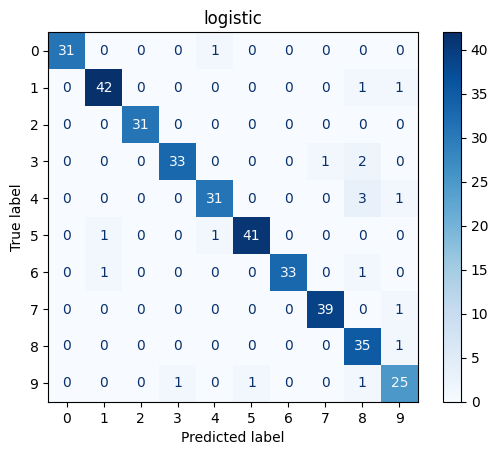

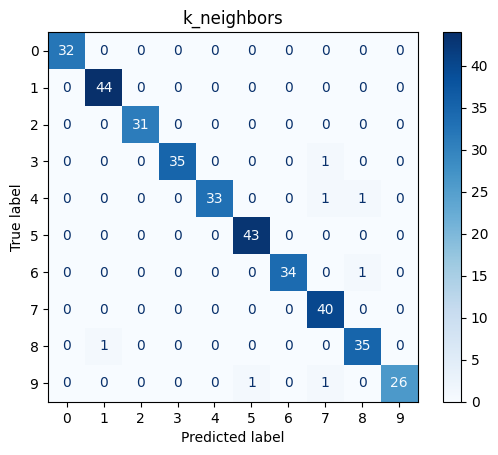

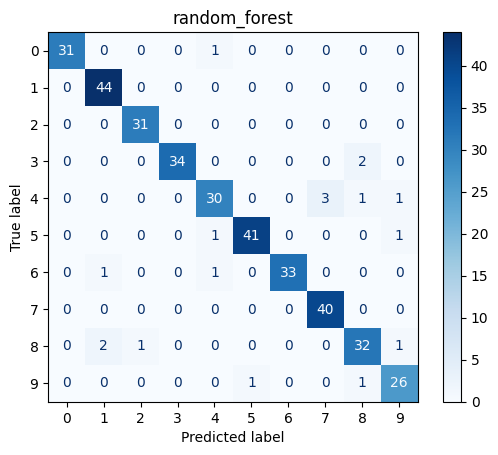

In [186]:
for i in range(len(cl_name)):
    graph[i].plot(cmap='Blues')
    plt.title(cl_name[i])

Respondamos a las preguntas sugeridas.

* ¿Cuál modelo es mejor basado en sus métricas?

El mejor modelo basado en las metricas `score` es el clasificador `K Neighbors`, pues es el que tiene mejor resultado en cada categoría.

* ¿Cuál modelo demora menos tiempo en ajustarse?

El modelo `K Neighbors`, con un tiempo 20 milisegundos, siendo un orden de magnitud menor al tiempo de los otros modelos.

* ¿Qué modelo escoges?

Dado las preguntas anteriores, el mejor modelo a escoger es el entrenado con el modelo clasificador `K Neighbors`.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

Hagamos estas curvas para los 10 dígitos del dataset. Aquí el modelo `K Neighbors` corresponde a `cl_model[1]` de acuerdo a la implementación pasada.

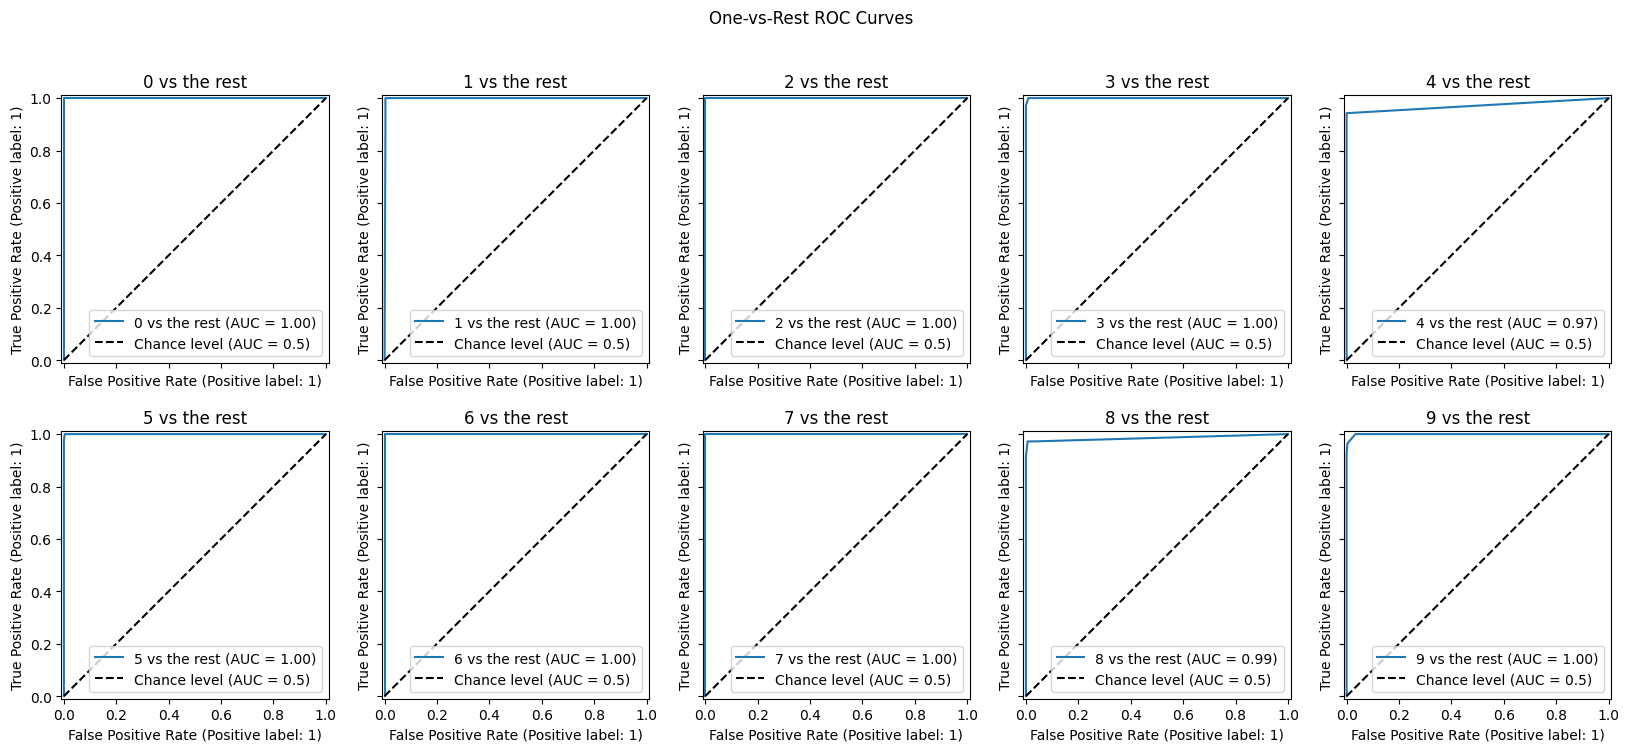

In [187]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

fig,axs=plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

for i in range(10):

    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    y_score = cl_model[1].predict_proba(X_test)

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        plot_chance_level=True,
        ax=axs[i//5,i%5]
    )

    axs[i//5,i%5].set_title(f"{class_of_interest} vs the rest")

plt.suptitle("One-vs-Rest ROC Curves")
plt.show()

Podemos ver que todas las "One-vs-Rest ROC Curves" son muy empinadas, y todas tienen area debajo de la curva de 1.00 aproximadamente (salvo la curva del 4 y 8, que tiene área bajo la curva respectivavmente de 0.97 y 0.99 aproximadamente). Esto significa que el modelo predice muy bien el resultado, pues tiene un muy buen índice de verdaderos positivos para cada dígito.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [188]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Hagamos los gráficos correspondientes a cada pregunta.

* El valor predicho y original son iguales: Como hay muchos aciertos, se mostrarán los primeros 25.

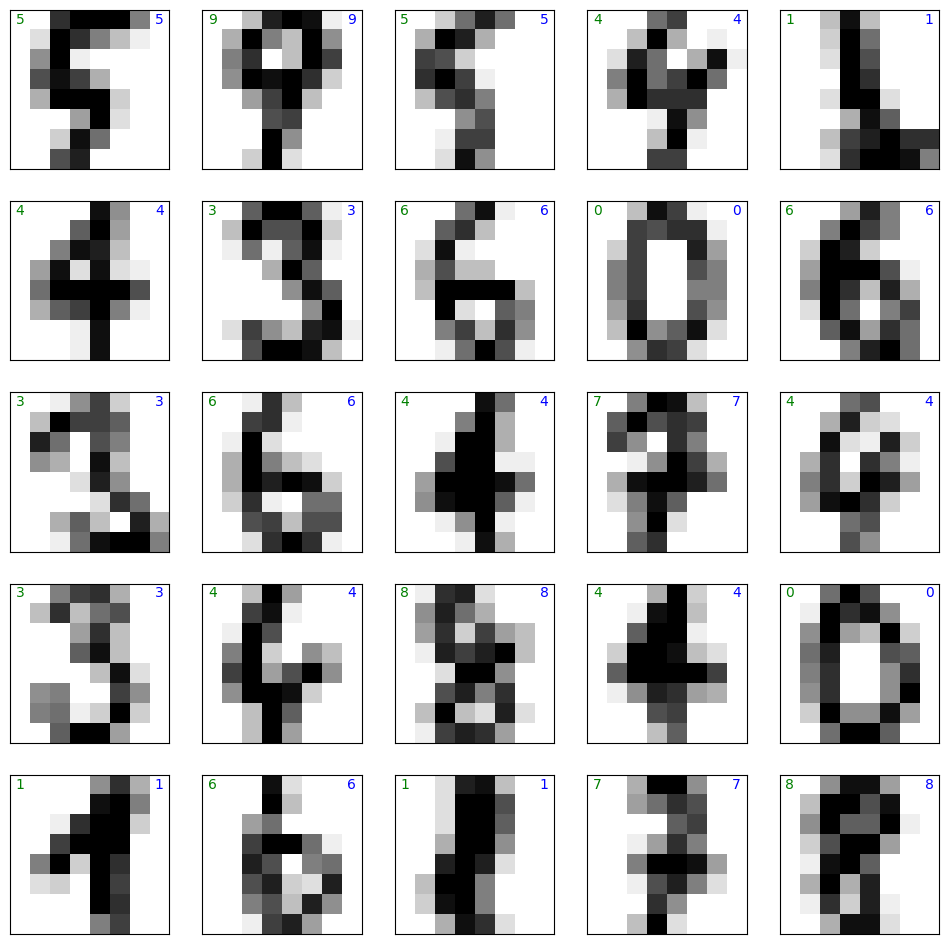

In [189]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=5,ny=5,label='correctos')

 * El valor predicho y original son distintos:

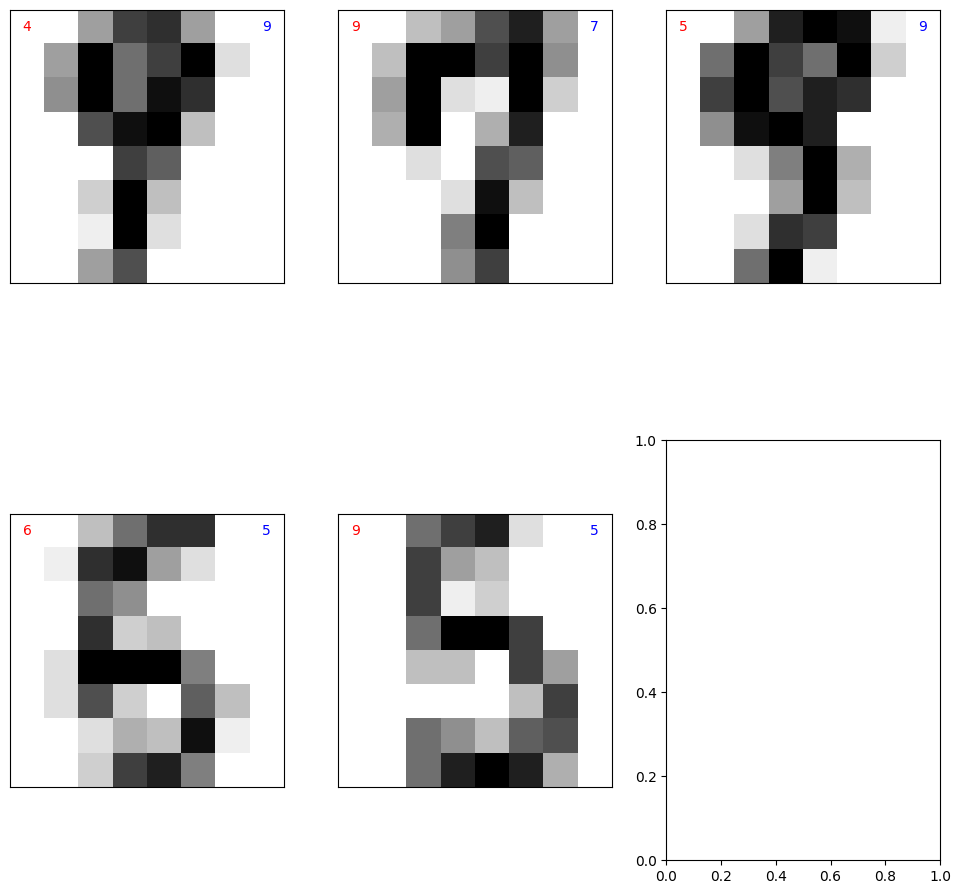

In [190]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=2,ny=3,label='incorrectos')

Podemos ver que este modelo solo se equivoco en 5 instancias. En estos pocos casos, podemos observar que los números originales tienen un alto grado de distorsión, y son fáciles de confundir. En orden de izquierda a derecha, arriba a abajo, tenemos que:

- Confundió un 9 con un 4. Aquí el 9 está bastante mal dibujado, con el palo del 9 saliendo del centro del círculo derecho hacia abajo.
- Confundió un 7 con un 9. Aqui el extremo superior izquierdo del 7 se curva hacia abajo bastante, asimilandose un poco a un 9.
- Confundió un 5 con un 6. Estos números son bastante cercanos en tipografía, y en este caso este 5 fue dibujado con sus vértices muy cercanos pareciendose bastante a un 6.
- Confundió un 9 con un 5. Este parece un error genuino del modelo.
- Confundió un 5 con un 9. Este parece un error genuino del modelo.

Vemos que este modelo tuvo problemas principalmente con el dígito 9 y con el dígito 5, con 3 de los 5 errores totales siendo razonables con la data original.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Opino que el modelo entrenado en este problema resuelve bastante bien en realizar la mejor predicción posible de una imagen, que en este caso es un dibujo de un número del 0 al 9. De los 1797 dibujos, predijo correctamente 1792 de ellos y se equivoco solamente 5 veces, de los cuales 3 de los 5 errores eran dibujos que presentaban distorsión severa.

Unos buenos trabajos a futuro despues de crear este modelo puede ser predecir números de múltiples dígitos e identificar más símbolos aparte de números. En estos casos (a excepción de mejorar la resolución probablemente), se induciría mayor dificultad al modelo predictivo, puesto que se pueden presentar distintos problemas no muy presentes en lo analizado previamente. Al añadir más símbolos, hay más posibilidades de confusión por la baja resolución, y el predecir números de más de un dígito presentaría problemas separando los dígitos individuales y en acertar, pues debe tener multiples aciertos individuales por dígito para acertar.
